## Edit Distance

In [1]:
import editdistance

In [3]:
import jieba

In [4]:
def cut(string): return list(jieba.cut(string))

In [2]:
string1 = '今天真是个好日子'
string2 = '今天是个好日子'

In [5]:
editdistance.eval(cut(string1), cut(string2))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4l/c_tcf0j90c1d07h0xr4c4ql40000gn/T/jieba.cache
Loading model cost 1.400 seconds.
Prefix dict has been built succesfully.


1

In [6]:
string3 = '我早上去吃饭了'
string4 = '我去吃早饭了'
string5 = '我晚上去吃饭了'

In [7]:
def get_edit_distance(str1, str2): return editdistance.eval(cut(str1), cut(str2))

In [8]:
get_edit_distance(string3, string4)

3

In [9]:
get_edit_distance(string3, string5)

1

In [10]:
## 语义层面的
## 句子 句法 语法 

In [17]:
print(get_edit_distance('这个人很好看漂亮', '这个人很美丽动人'))
print(get_edit_distance('这个人很好看漂亮', '这个人很不好看'))

2
2


In [18]:
## advantage 

In [19]:
## 算法工程师， 科学家

## Tfidf

## Keywords

1. 出现多的词汇 ==》 更重要；
2. 越少出现的单词 越重要； 

tf = term frequency

$tf = \frac{Term_{num}} {Word_{num}}$

idf = inverse document frequency

$ idf = \log(\frac{D_{all}}{D_{w}})$

In [20]:
## github.com/deep-.../Dataset_source

In [21]:
import pandas as pd

In [22]:
content = pd.read_csv('dataset/sqlResult_1558435.csv', encoding='gb18030')

In [24]:
len(content)

89611

In [26]:
content.columns

Index(['id', 'author', 'source', 'content', 'feature', 'title', 'url'], dtype='object')

In [25]:
content.iloc[0].content

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [28]:
from collections import Counter

In [31]:
def term_frequency(word, i):
    words = cut(content.iloc[i].content)
    words_counts = Counter(words)
    return words_counts[word] / sum(words_counts.values())

In [33]:
term_frequency('小米', 0)

0.009615384615384616

In [35]:
mini_test_num = 1000

In [39]:
documents_words_counter = [
    Counter(cut(str(content.iloc[i].content))) for i in range(mini_test_num)
]

In [43]:
import numpy as np

In [44]:
def inverse_document_frequency(word): 
    return np.log(len(documents_words_counter) / sum(1 for counter in documents_words_counter if word in counter))

In [46]:
inverse_document_frequency('小米')

4.605170185988092

In [47]:
def tfidf(word, i): return term_frequency(word, i) * inverse_document_frequency(word)

In [48]:
tfidf('小米', 0)

0.044280482557577806

In [59]:
documents_words_counter[0].most_common(15)

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2),
 ('发布', 2),
 ('精力', 2),
 ('也', 2),
 ('是', 2),
 ('9', 2)]

In [53]:
tfidf_of_text_0 = {
    word : tfidf(word, 0) for word in documents_words_counter[0]
}

In [58]:
sorted(tfidf_of_text_0.items(), key=lambda x: x[1], reverse=True)[:15]

[('MIUI', 0.1992621715091001),
 ('机型', 0.09058712887780611),
 ('精力', 0.08505478133065648),
 ('体验版', 0.0664207238363667),
 ('稳定版', 0.0664207238363667),
 ('暂不受', 0.0664207238363667),
 ('系统优化', 0.0664207238363667),
 ('距今已有', 0.0664207238363667),
 ('有余', 0.0664207238363667),
 ('更新换代', 0.0664207238363667),
 ('内测', 0.05975584710021338),
 ('确切', 0.05975584710021338),
 ('用到', 0.05585714413763489),
 ('官方消息', 0.05309097036406006),
 ('小米', 0.044280482557577806)]

## Based on the tfidf to buid the vector to represent each document

documents = [word0, word1, word2, ................ , word3]
docuemnt0 = [0, 1, 1, 3, 0.121, ]
docuemnt1 = [0, 1.2, 0, 0, 0.121, ]

$\forall d_i, d_j, d_k, if dis(\vec{d_i}, \vec{d_j}) < dis(\vec{d_i}, \vec{d_k})$
==> 


words ==> vector ==> 意思相近程度

## get all the words 

In [61]:
Counter([1, 1, 2]) + Counter([2, 1])

Counter({1: 3, 2: 2})

In [62]:
from functools import reduce

In [63]:
import operator as op

In [66]:
all_words_counter = reduce(op.add, documents_words_counter)

In [67]:
len(all_words_counter)

47008

In [68]:
document_0 = [tfidf(w, 0) for w in all_words_counter]

In [70]:
## tfidf ==> sci-kit learning; 

In [71]:
## Project; 

### Wordcloud

In [72]:
import wordcloud

In [88]:
wc = wordcloud.WordCloud(font_path='/Users/kouminquan/Downloads/simkai.ttf')

In [89]:
word_cloud = wc.generate_from_text(' '.join(cut(content.iloc[0].content)))

In [90]:
import matplotlib.pyplot as plt

In [91]:
%matplotlib inline

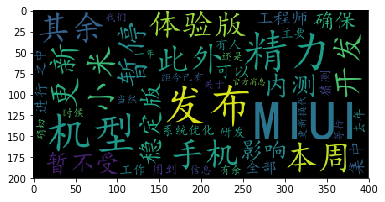

In [92]:
plt.imshow(word_cloud)

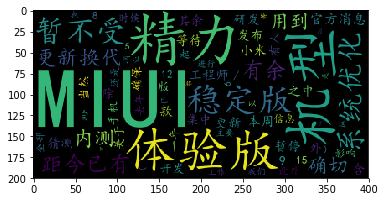

In [93]:
plt.imshow(word_cloud_by_tfidf)

In [1]:
from gensim.models.keyedvectors import KeyedVectors

In [3]:
model = KeyedVectors.load_word2vec_format('/Users/kouminquan/Downloads/model.vec')

In [ ]:
model.most_similar('你我')b